Import numpy and pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib

Using the bash magic command, view the list of files inside of the data directory.

In [2]:
%%bash
ls data

ActiveFile-Wilm1thru8-20191015.csv
DE-VoterFile-Documentation 20171010.pdf


Load the csv file into a Pandas DataFrame.

In [3]:
# "/Users/psehgal/dev/DataEngineering.Labs.CityOfNewarkDETreeSurvey/data/newark_tree_data.csv",engine="python")
           
           
df = pd.read_csv("/Users/psehgal/dev/DataEngineering.Labs.RegisteredVotersFileWilmingtonDE/data/ActiveFile-Wilm1thru8-20191015.csv",engine="python")


Display a list of columns in the DataFrame.

In [4]:
# 
df.columns

Index(['UNIQUE-ID', 'LAST-NAME', 'FIRST-NAME', 'MID-INIT', 'SUFFIX',
       'YEAR-OF-BIRTH', 'HOME-NO', 'HOME-APT', 'HOME-STREET', 'HOME-DEV',
       'HOME-CITY', 'HOME-ZIPCODE', 'COUNTY', 'ED', 'RD', 'SD', 'CNLEVY',
       'WILM', 'CODE-HOME-CITY', 'SCH-DIST', 'PARTY', 'DATE-REG', 'PP-HIST-1',
       'PP-HIST-2', 'PR-HIST-1', 'PR-HIST-2', 'PR-HIST-3', 'GEN-HIST-1',
       'GEN-HIST-2', 'GEN-HIST-3', 'GEN-HIST-4', 'GEN-HIST-5', 'SP-HIST-1',
       'SP-HIST-2', 'SP-HIST-3', 'SCHL-HIST-1', 'SCHL-HIST-2', 'SCHL-HIST-3',
       'SCHL-HIST-4', 'SCHL-HIST-5', 'REF-HIST-1', 'REF-HIST-2', 'REF-HIST-3',
       'REF-HIST-4', 'REF-HIST-5', 'MAIL-NO', 'MAIL-APT', 'MAIL-STR',
       'MAIL-CITY', 'MAIL-STATE', 'MAIL-ZIP', 'DATE-LAST-CHG', 'CODE-CHANGE',
       'STATUS'],
      dtype='object')

What is the shape of this DataFrame? How many columns does each row have? How many rows are there?

In [5]:
# 
df.shape


(51909, 54)

# HOME ZIP CODE

Group objects using the HOME-ZIPCODE column. Assign the value to a variable called grouped_zc.  
[Pandas Groupby User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [6]:
grouped_zc = df.groupby('HOME-ZIPCODE')

What type of object is grouped_zc?

In [7]:
grouped_zc.dtypes

,UNIQUE-ID,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,YEAR-OF-BIRTH,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,...,REF-HIST-5,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,MAIL-ZIP,DATE-LAST-CHG,CODE-CHANGE,STATUS
HOME-ZIPCODE,,,,,,,,,,,,,,,,,,,,,
19801,int64,object,object,object,object,int64,object,object,object,object,...,float64,object,object,object,object,object,float64,int64,object,object
19802,int64,object,object,object,object,int64,object,object,object,object,...,float64,object,object,object,object,object,float64,int64,object,object
19805,int64,object,object,object,object,int64,object,object,object,object,...,float64,object,object,object,object,object,float64,int64,object,object
19806,int64,object,object,object,object,int64,object,object,object,object,...,float64,object,object,object,object,object,float64,int64,object,object
19807,int64,object,object,object,object,int64,object,object,object,object,...,float64,object,object,object,object,object,float64,int64,object,object


DataFrameGroupBy objects contain a groups attribute. Display the value of the groups attribute belonging to the grouped_zc object.

In [8]:


grouped_zc = df.groupby('HOME-ZIPCODE')

Invoke the size method on the grouped_zc object to find out how many items are associated with each zip code.

In [9]:
grouped_zc.size()

HOME-ZIPCODE
19801    10730
19802    17182
19805    15548
19806     8326
19807      123
dtype: int64

Use a magic command so that matplotlib graphics will display inline.

In [10]:
%matplotlib inline

Create a pie chart illustrating the number of voters per zip code.

([<matplotlib.patches.Wedge at 0x113aca150>,
 [Text(0.8760967626973386, 0.6651725057391077, '19801'),
  Text(-0.764058752148303, 0.7913369846440758, '19802'),
  Text(-0.42112865275664896, -1.0161942028113375, '19805'),
  Text(0.9552631610472119, -0.5454102063090577, '19806'),
  Text(1.099969521734947, -0.008188483021424421, '19807')])

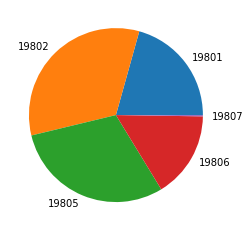

In [11]:
from matplotlib import pyplot as plt
labels = '19801', '19802', '19805', '19806', '19807'
matplotlib.pyplot.pie(grouped_zc.size(), labels = labels)

# YEAR OF BIRTH

Group objects by the YEAR-OF-BIRTH column. Assign the value to an object called "grouped_yob".

In [12]:
grouped_yob = df.groupby('YEAR-OF-BIRTH')

Display the value of the groups attribute belonging the grouped_yob object.

In [13]:
grouped_yob

Select the object for the row indicating that the voter was born in 1900.

In [14]:
df.loc[lambda df:df['YEAR-OF-BIRTH'] < 1901, :]

,UNIQUE-ID,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,YEAR-OF-BIRTH,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,...,REF-HIST-5,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,MAIL-ZIP,DATE-LAST-CHG,CODE-CHANGE,STATUS
49249,101092654,KENNEDY,JORDAN,D,NaN,1900,724,NaN,N BANCROFT PKY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170731,P6,I


Graph a histogram to  illustrate the age distribution of voters in this dataset. Ty using different values for the bins attribute of the histogram. 

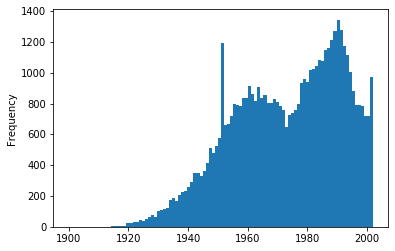

In [15]:
df['YEAR-OF-BIRTH'].plot.hist(bins=100)

# PARTY

Group objects using the PARTY column. Assign the value to a variable called grouped_p.

In [16]:
grouped_p = df.groupby('PARTY')

Display the value of the groups attribute belonging to the grouped_p object.

In [17]:
grouped_p

Invoke the size method on the grouped_p object to find out how many items are associated with each party.

In [18]:
grouped_p.size()

PARTY
A       52
B      441
D    38020
E       30
G       42
H       82
I     7670
J      161
L       98
M        1
O       33
Q       17
R     4851
T       14
V       11
W      333
Y       14
Z       39
dtype: int64

Create a bar chart to visualize the number of voters associated with each party.

In [ ]:
grouped_p.plot.bar()

# Merging Two DataFrames

Using the data from the documentation, create a Pandas DataFrame that contains the party code and the corresponding legal name for each party.

In [ ]:
# legal_names = {}

In [ ]:
# df_legal_names = pd.DataFrame(legal_names)

In [ ]:
# df_legal_names

Create a Pandas DataFrame that contains the Party code and the corresponding number of registered voters for said party.

In [ ]:
# Create DataFrame df_party_counts here 

In [ ]:
# df_party_counts 

Merge the two DataFrames.

In [ ]:
# Merge DataFrame here 

In [ ]:
# Display new DataFrame here 

Create a bar graph again but using the legal name for each party as the value on the x axes.

In [ ]:
# 